In [ ]:
'''
Joann Esteban Bedoya
Willian David Correa
Alejandro Mesa
'''

In [ ]:
!kaggle datasets download jehanbhathena/weather-dataset
!unzip weather-dataset.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Definir los parámetros de las imágenes
img_height, img_width = 150, 150
batch_size = 32

# Crear un generador de datos que cargue imágenes desde las carpetas
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Directorio donde están las imágenes
dataset_dir = '/content/dataset'

# Cargar los datos de entrenamiento
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Cargar los datos de validación
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Función para aplanar las imágenes
def flatten_images(generator):
    images, labels = [], []
    for _ in range(len(generator)):
        X_batch, y_batch = generator.__next__()  # Cambiado de .next() a .__next__()
        X_flat = X_batch.reshape(X_batch.shape[0], -1)  # Aplanar las imágenes
        images.append(X_flat)
        labels.append(y_batch)
    return np.vstack(images), np.vstack(labels)

# Aplanar imágenes de entrenamiento y validación
X_train, y_train = flatten_images(train_generator)
X_val, y_val = flatten_images(validation_generator)

# Mostrar las dimensiones de las imágenes aplanadas
print("Dimensión de X_train aplanada:", X_train.shape)
print("Dimensión de y_train:", y_train.shape)


Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.
Dimensión de X_train aplanada: (5493, 67500)
Dimensión de y_train: (5493, 11)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo MLP
input_dim = X_train.shape[1]

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),  # Primera capa densa
    Dense(256, activation='relu'),  # Capa oculta
    Dense(len(train_generator.class_indices), activation='softmax')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ver el resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │      34,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,694,667 (132.35 MB)

 Trainable params: 34,694,667 (132.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10  # Ajusta según el tiempo disponible

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    batch_size=batch_size
)


Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 112s 646ms/step - accuracy: 0.2211 - loss: 26.5616 - val_accuracy: 0.2885 - val_loss: 2.8846
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 142s 647ms/step - accuracy: 0.4123 - loss: 2.0887 - val_accuracy: 0.4251 - val_loss: 1.8678
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 147s 678ms/step - accuracy: 0.4811 - loss: 1.6420 - val_accuracy: 0.4843 - val_loss: 1.6199
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 113s 660ms/step - accuracy: 0.5129 - loss: 1.5474 - val_accuracy: 0.4770 - val_loss: 1.7066
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 143s 664ms/step - accuracy: 0.5311 - loss: 1.4641 - val_accuracy: 0.4675 - val_loss: 1.6651
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 145s 682ms/step - accuracy: 0.5334 - loss: 1.4361 - val_accuracy: 0.4763 - val_loss: 1.5978
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 138s 658ms/step - accuracy: 0.5528 - loss: 1.4046 - val_accuracy: 0.5099 - val_loss: 1.6079
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 144s 669ms/step - accuracy: 0.5610 

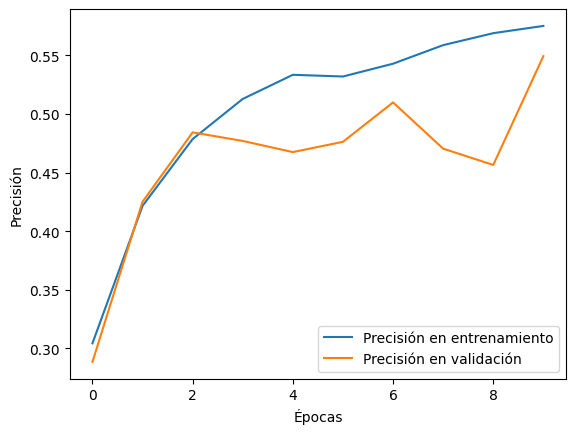

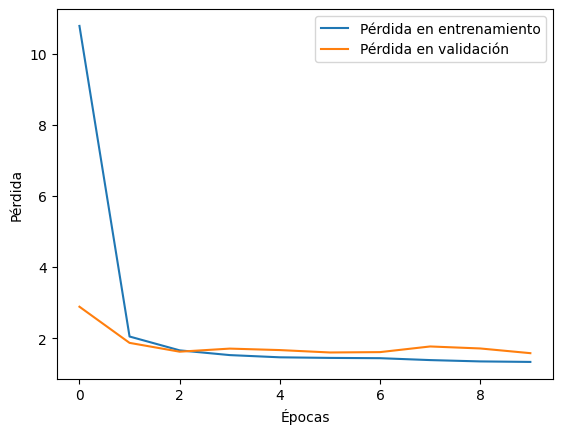

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de la precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

# Gráfico de la pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()
